In [5]:
from os.path import isdir, isfile, join, abspath
mode = "training"
dataset_dir = abspath("../datasets/drugprot-gs-training-development/{}/".format(mode))

abs_file = "drugprot_training_abstracs.tsv"
ent_file = "drugprot_training_entities.tsv"
rel_file = "drugprot_training_relations.tsv"

In [6]:
def label_mapper(label):
    if "GENE" in label:
        return "GENE"
    if "CHEMICAL" in label:
        return "CHEMICAL"
    return label


import csv
ent_pth = []
entities = {}

with open(dataset_dir+ "/" + ent_file, "r", encoding="utf8") as fin:
    for row in csv.reader(fin, delimiter="\t"):
        #print(row)
        
        doc_id = int(row[0])
        ent_id = row[1]
        
        if doc_id not in entities:
            entities[doc_id] = []
            
        entities[doc_id].append({
            "label": label_mapper(row[2]),
            "start": int(row[3]),
            "end": int(row[4]),
            "id": ent_id,
            "txt": row[5]
        })
        #print(entities)

In [7]:
print(len(entities))
print(entities[list(entities.keys())[0]])

3500
[{'label': 'CHEMICAL', 'start': 1165, 'end': 1174, 'id': 'T1', 'txt': 'diazoxide'}, {'label': 'CHEMICAL', 'start': 1450, 'end': 1459, 'id': 'T2', 'txt': 'Diazoxide'}, {'label': 'CHEMICAL', 'start': 1901, 'end': 1910, 'id': 'T3', 'txt': 'diazoxide'}, {'label': 'CHEMICAL', 'start': 1993, 'end': 2002, 'id': 'T4', 'txt': 'glutamate'}, {'label': 'CHEMICAL', 'start': 917, 'end': 924, 'id': 'T5', 'txt': 'glucose'}, {'label': 'CHEMICAL', 'start': 964, 'end': 971, 'id': 'T6', 'txt': 'glucose'}, {'label': 'CHEMICAL', 'start': 1049, 'end': 1058, 'id': 'T7', 'txt': 'diazoxide'}, {'label': 'GENE', 'start': 219, 'end': 226, 'id': 'T8', 'txt': 'insulin'}, {'label': 'GENE', 'start': 1630, 'end': 1634, 'id': 'T9', 'txt': 'SUR1'}, {'label': 'GENE', 'start': 1638, 'end': 1644, 'id': 'T10', 'txt': 'KIR6.2'}, {'label': 'GENE', 'start': 1844, 'end': 1848, 'id': 'T11', 'txt': 'SUR1'}, {'label': 'GENE', 'start': 1860, 'end': 1866, 'id': 'T12', 'txt': 'KIR6.2'}, {'label': 'GENE', 'start': 1993, 'end': 201

In [8]:
import csv
ent_pth = []
relns = {}

with open(dataset_dir+ "/" + rel_file, "r", encoding="utf8") as fin:
    for row in csv.reader(fin, delimiter="\t"):
        doc_id = int(row[0])
        reln = row[1]
        arg1 = row[2][5:]
        arg2 = row[3][5:]
        #print(row)
        #print(doc_id, reln, arg1, arg2)
        
        if doc_id not in relns:
            relns[doc_id] = []
        
        relns[doc_id].append({
            "label": reln,
            "id": doc_id,
            "ent1": arg1,
            "ent2": arg2
        })

In [9]:
relns

{23017395: [{'label': 'INHIBITOR',
   'id': 23017395,
   'ent1': 'T15',
   'ent2': 'T21'},
  {'label': 'INHIBITOR', 'id': 23017395, 'ent1': 'T16', 'ent2': 'T21'}],
 12181427: [{'label': 'PART-OF', 'id': 12181427, 'ent1': 'T3', 'ent2': 'T22'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T6', 'ent2': 'T23'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T7', 'ent2': 'T23'},
  {'label': 'PART-OF', 'id': 12181427, 'ent1': 'T5', 'ent2': 'T23'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T8', 'ent2': 'T24'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T8', 'ent2': 'T25'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T8', 'ent2': 'T26'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T8', 'ent2': 'T27'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T9', 'ent2': 'T28'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T10', 'ent2': 'T29'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1': 'T10', 'ent2': 'T30'},
  {'label': 'INHIBITOR', 'id': 12181427, 'ent1'

In [10]:
import csv
ent_pth = []
docs = {}

with open(dataset_dir+ "/" + abs_file, "r", encoding="utf8") as fin:
    for row in csv.reader(fin, delimiter="\t"):
        assert(len(row) == 3)
        doc_id = int(row[0])
        txt = row[1] + "\t" + row[2]
        
        if doc_id not in relns:
            docs[doc_id] = {}
        
        docs[doc_id] = {
            "id": doc_id,
            "txt": txt
        }

In [11]:
sents_len = [len(docs[doc]["txt"].split()) for doc in docs]

In [12]:
!pip install matplotlib
import matplotlib.pyplot as plt

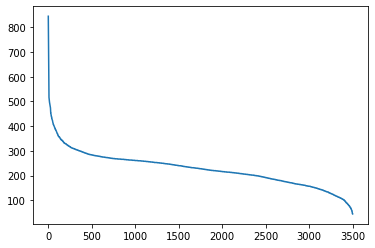

In [13]:
plt.plot(sorted(sents_len, reverse=True))

In [14]:
sents = [docs[doc]["txt"] for doc in docs]
sorted_sents = sorted(sents, key=lambda s: -len(s.split()))

In [15]:
# sorted_sents[0]

In [10]:
import spacy
tokenizer  = spacy.load("en_core_sci_sm")
# sent_spans = tokenizer(sorted_sents[0]).sents
# print(sorted_sents[0])
# for a in sent_spans:
#     print(str(a) + "$$$$")
#     print(a.start_char, a.end_char)

In [11]:
curr_sent = docs[17512723]["txt"]
sent_spans = tokenizer(curr_sent).sents
print(curr_sent)
print("\n\n")
for a in sent_spans:
    print(str(a))
    for ent in entities[17512723]:
        if ent['start'] >= a.start_char and ent['start'] < a.end_char:
            print(ent)
            print(str(a)[:ent["start"]-a.start_char] + 
                  " $$ " + 
                  str(a)[ent["start"]-a.start_char:ent["end"]-a.start_char] + 
                  " $$ " + 
                  str(a)[ent["end"]-a.start_char:])
    print("\n\n")

RDH12, a retinol dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.	Three retinol dehydrogenases (RDHs) were tested for steroid converting abilities: human and murine RDH 12 and human RDH13. RDH12 is involved in retinal degeneration in Leber's congenital amaurosis (LCA). We show that murine Rdh12 and human RDH13 do not reveal activity towards the checked steroids, but that human type 12 RDH reduces dihydrotestosterone to androstanediol, and is thus also involved in steroid metabolism. Furthermore, we analyzed both expression and subcellular localization of these enzymes.



RDH12, a retinol dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.
{'label': 'CHEMICAL', 'start': 9, 'end': 16, 'id': 'T3', 'txt': 'retinol'}
RDH12, a  $$ retinol $$  dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.
{'label': 'GENE', 'start': 0, 'end': 5, 'id': 'T12', 'txt': 'RDH12'}
 $$ RDH1

In [12]:
curr_sent = docs[17512723]["txt"]
sent_spans = tokenizer(curr_sent).sents
print(curr_sent)
print("\n\n")
for a in sent_spans:
    print(str(a))
    for ent in entities[17512723]:
        if ent['start'] >= a.start_char and ent['start'] < a.end_char:
            print(ent)
            print(str(a)[:ent["start"]-a.start_char] + 
                  " $$ " + 
                  str(a)[ent["start"]-a.start_char:ent["end"]-a.start_char] + 
                  " $$ " + 
                  str(a)[ent["end"]-a.start_char:])
    print("\n\n")

RDH12, a retinol dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.	Three retinol dehydrogenases (RDHs) were tested for steroid converting abilities: human and murine RDH 12 and human RDH13. RDH12 is involved in retinal degeneration in Leber's congenital amaurosis (LCA). We show that murine Rdh12 and human RDH13 do not reveal activity towards the checked steroids, but that human type 12 RDH reduces dihydrotestosterone to androstanediol, and is thus also involved in steroid metabolism. Furthermore, we analyzed both expression and subcellular localization of these enzymes.



RDH12, a retinol dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.
{'label': 'CHEMICAL', 'start': 9, 'end': 16, 'id': 'T3', 'txt': 'retinol'}
RDH12, a  $$ retinol $$  dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.
{'label': 'GENE', 'start': 0, 'end': 5, 'id': 'T12', 'txt': 'RDH12'}
 $$ RDH1

In [13]:
ent_type_to_list = {"GENE":[], "CHEMICAL":[]}
for ent in entities[17512723]:
    ent_type_to_list[ent['label']].append(ent)
    
for t in ent_type_to_list:
    print(t, ent_type_to_list[t])

GENE [{'label': 'GENE', 'start': 219, 'end': 230, 'id': 'T4', 'txt': 'human RDH13'}, {'label': 'GENE', 'start': 232, 'end': 237, 'id': 'T5', 'txt': 'RDH12'}, {'label': 'GENE', 'start': 326, 'end': 338, 'id': 'T6', 'txt': 'murine Rdh12'}, {'label': 'GENE', 'start': 343, 'end': 354, 'id': 'T7', 'txt': 'human RDH13'}, {'label': 'GENE', 'start': 139, 'end': 143, 'id': 'T8', 'txt': 'RDHs'}, {'label': 'GENE', 'start': 417, 'end': 434, 'id': 'T9', 'txt': 'human type 12 RDH'}, {'label': 'GENE', 'start': 115, 'end': 137, 'id': 'T10', 'txt': 'retinol dehydrogenases'}, {'label': 'GENE', 'start': 191, 'end': 214, 'id': 'T11', 'txt': 'human and murine RDH 12'}, {'label': 'GENE', 'start': 0, 'end': 5, 'id': 'T12', 'txt': 'RDH12'}, {'label': 'GENE', 'start': 9, 'end': 30, 'id': 'T13', 'txt': 'retinol dehydrogenase'}]
CHEMICAL [{'label': 'CHEMICAL', 'start': 466, 'end': 480, 'id': 'T1', 'txt': 'androstanediol'}, {'label': 'CHEMICAL', 'start': 115, 'end': 122, 'id': 'T2', 'txt': 'retinol'}, {'label': '

In [17]:
sents = []
import copy
for doc_id in list(docs.keys())[:10]:
    curr_sent = docs[doc_id]["txt"]
    sent_spans = tokenizer(curr_sent).sents
    ent_type_to_list = {"GENE":[], "CHEMICAL":[]}
    for ent in entities[doc_id]:
        ent_type_to_list[ent['label']].append(ent)
    
    for span_id, a in enumerate(sent_spans):
        print(doc_id, str(a))
        sent_a = str(a)
        ent_pairs = [(copy.deepcopy(ent1), copy.deepcopy(ent2)) 
                     for ent1 in ent_type_to_list["GENE"] 
                     for ent2 in ent_type_to_list["CHEMICAL"]]
        for (ent1, ent2) in ent_pairs:
            if (ent1['start'] >= a.start_char and ent1['start'] < a.end_char and 
                ent2['start'] >= a.start_char and ent2['start'] < a.end_char):
                if ent1["start"] > ent2["start"]:
                    ent1, ent2 = ent2, ent1
                print("  ------", ent1["txt"], "------", ent2["txt"], "-------")
                new_sent = [
                    sent_a[:ent1["start"]-a.start_char],
                    "@", ent1["label"], "$",
                    sent_a[ent1["end"]-a.start_char:ent2["start"]-a.start_char],
                    "@", ent2["label"], "$",
                    sent_a[ent2["end"]-a.start_char:],
                    "\n"
                ]
                new_sent = "".join(new_sent)
                print(str(doc_id) + "\t" + str(span_id) + "\t" + new_sent)
                assert(ent1["label"] != ent2["label"])
    print("\n\n\n\n")

17512723 RDH12, a retinol dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.
  ------ RDH12 ------ retinol -------
17512723	0	@GENE$, a @CHEMICAL$ dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.

  ------ retinol dehydrogenase ------ retinol -------
17512723	0	RDH12, a @GENE$@CHEMICAL$ dehydrogenase causing Leber's congenital amaurosis, is also involved in steroid metabolism.

17512723 	Three retinol dehydrogenases (RDHs) were tested for steroid converting abilities: human and murine RDH 12 and human RDH13.
  ------ retinol ------ human RDH13 -------
17512723	1		Three @CHEMICAL$ dehydrogenases (RDHs) were tested for steroid converting abilities: human and murine RDH 12 and @GENE$.

  ------ retinol ------ RDHs -------
17512723	1		Three @CHEMICAL$ dehydrogenases (@GENE$) were tested for steroid converting abilities: human and murine RDH 12 and human RDH13.

  ------ retinol dehydrogenases ------ retinol

  ------ insulin ------ glucose -------
17292977	10	Administration of AC3174 resulted in a 4-fold increase in @GENE$ concentrations in normal mice following an IP @CHEMICAL$ challenge.

17292977 AC3174 was also shown to inhibit food intake and decrease gastric emptying in rodent models.
17292977 AC3174 was stable in human plasma (>90% of parent peptide was present after 5 h of incubation).
17292977 In rats, the in vivo half-life of AC3174 was 42-43 min following SC administration.
17292977 In summary, AC3174 is an analog of exenatide that binds to the GLP-1 receptor in vitro and shares many of the biological and glucoregulatory activities of exenatide and GLP-1 in vivo.





23348500 A novel metabotropic glutamate receptor 5 positive allosteric modulator acts at a unique site and confers stimulus bias to mGlu5 signaling.
  ------ glutamate ------ mGlu5 -------
23348500	0	A novel metabotropic @CHEMICAL$ receptor 5 positive allosteric modulator acts at a unique site and confers stimulus 

  ------ dopamine D1 receptors ------ dopamine -------
7828655	5	Treatment with fluphenazine-N-mustard, which blocked about 85% of the dopamine D2 receptors in substantia nigra but had no significant effect on @GENE$@CHEMICAL$ D1 receptors, increased the levels of dopamine D2 receptor mRNA by about 34%.

  ------ dopamine D1 receptors ------ dopamine -------
7828655	5	Treatment with fluphenazine-N-mustard, which blocked about 85% of the dopamine D2 receptors in substantia nigra but had no significant effect on @GENE$, increased the levels of @CHEMICAL$ D2 receptor mRNA by about 34%.

  ------ fluphenazine-N-mustard ------ dopamine D1 receptors -------
7828655	5	Treatment with @CHEMICAL$, which blocked about 85% of the dopamine D2 receptors in substantia nigra but had no significant effect on @GENE$, increased the levels of dopamine D2 receptor mRNA by about 34%.

  ------ dopamine ------ dopamine D1 receptors -------
7828655	5	Treatment with fluphenazine-N-mustard, which blocked about 

15456329 In RA, nabumetone has shown a comparable clinical efficacy to aspirin (acetylsalicylic acid), diclofenac, piroxicam, ibuprofen and naproxen.
15456329 Clinical trials and a decade of worldwide safety data and long-term postmarketing surveillance studies show that nabumetone is generally well tolerated.
15456329 The most frequent adverse effects are those commonly seen with COX inhibitors, which include diarrhoea, dyspepsia, headache, abdominal pain and nausea.
15456329 In common with other COX inhibitors, nabumetone may increase the risk of GI perforations, ulcerations and bleedings (PUBs).
15456329 However, several studies show a low incidence of PUBs, and on a par with the numbers reported from studies with COX-2 selective inhibitors and considerably lower than for nonselective COX inhibitors.
15456329 This has been attributed mainly to the non-acidic chemical properties of nabumetone but also to its COX-1/COX-2 inhibitor profile.
  ------ nabumetone ------ COX-1 -------
1545

17258485 These data indicate the presence of an electrogenic, sodium-dependent vitamin C transporter (SVCT1) in the chick renal proximal tubule.
  ------ sodium ------ vitamin C transporter -------
17258485	9	These data indicate the presence of an electrogenic, @CHEMICAL$-dependent @GENE$ (SVCT1) in the chick renal proximal tubule.

  ------ vitamin C transporter ------ vitamin C -------
17258485	9	These data indicate the presence of an electrogenic, sodium-dependent @GENE$@CHEMICAL$ transporter (SVCT1) in the chick renal proximal tubule.

  ------ sodium ------ SVCT1 -------
17258485	9	These data indicate the presence of an electrogenic, @CHEMICAL$-dependent vitamin C transporter (@GENE$) in the chick renal proximal tubule.

  ------ vitamin C ------ SVCT1 -------
17258485	9	These data indicate the presence of an electrogenic, sodium-dependent @CHEMICAL$ transporter (@GENE$) in the chick renal proximal tubule.

17258485 Vitamin C transport and conservation by the kidney is likely to b

In [42]:
from tqdm.notebook import tqdm
import copy

sents = []
allsents_input = []

with open(dataset_dir + "/" + "re_input_all.tsv", "w", encoding="utf8") as ftest:
    ftest.write("\tDocId\tSpanId\tSentence\tlbl\n")
    for doc_id in tqdm(list(docs.keys())):
        if doc_id not in relns:
            #print("no relation found for this doc")
            continue
        reln_list = relns[doc_id]    
        curr_sent = docs[doc_id]["txt"]
        sent_spans = tokenizer(curr_sent).sents
        ent_type_to_list = {"GENE":[], "CHEMICAL":[]}
        for ent in entities[doc_id]:
            ent_type_to_list[ent['label']].append(ent)

        for span_id, a in enumerate(sent_spans):
            #print(doc_id, str(a))
            sent_a = str(a)
            ent_pairs = [(copy.deepcopy(ent1), copy.deepcopy(ent2)) 
                         for ent1 in ent_type_to_list["GENE"] 
                         for ent2 in ent_type_to_list["CHEMICAL"]]
            for (ent1, ent2) in ent_pairs:
                lbl = "NA"
                for rel in reln_list:
                    if ((ent1['id'] == rel["ent1"] and ent2['id'] == rel["ent2"]) or
                        (ent1['id'] == rel["ent2"] and ent2['id'] == rel["ent1"])):
                        lbl = rel["label"]

                if (ent1['start'] >= a.start_char and ent1['start'] < a.end_char and 
                    ent2['start'] >= a.start_char and ent2['start'] < a.end_char):

                    if ent1["start"] > ent2["start"]:
                        ent1, ent2 = ent2, ent1
                    if ent1["start"] == ent2["start"] and lbl != "NA":
                        print("warning: same start positiion", doc_id)
                        print(doc_id, "  ------", ent1["txt"], "------", ent2["txt"], "-------", a)
                    new_sent = [
                        sent_a[:ent1["start"]-a.start_char],
                        "@", ent1["label"], "$",
                        sent_a[ent1["end"]-a.start_char:ent2["start"]-a.start_char],
                        "@", ent2["label"], "$",
                        sent_a[ent2["end"]-a.start_char:]
                    ]
                    new_sent = "".join(new_sent)
                    curr_out_sent = str(doc_id) + "\t" + str(span_id) + "\t" + new_sent + "\t" + lbl + "\n"
                    allsents_input.append(curr_out_sent)
                    ftest.write(curr_out_sent)
                    assert(ent1["label"] != ent2["label"])
                elif lbl != "NA" and (ent1['start'] >= a.start_char and ent1['start'] < a.end_char and 
                    not (ent2['start'] >= a.start_char and ent2['start'] < a.end_char)):
                    print(doc_id, "entities not in the same sentence")
        #print("\n\n\n\n")

3440035 entities not in the same sentence
2512511 entities not in the same sentence
9313928 entities not in the same sentence
9313928 entities not in the same sentence
9313928 entities not in the same sentence
9313928 entities not in the same sentence
9313928 entities not in the same sentence
23579178   ------ C-peptide ------ C ------- Fasting plasma glucose (FPG), fasting plasma insulin, C-peptide (insulin secretory rate [ISR]), fasting plasma glucagon, and bioactive glucagon-like peptide (GLP-1) and gastrointestinal insulinotropic peptide (GIP) was measured.
9059856 entities not in the same sentence
9059856 entities not in the same sentence
15229223 entities not in the same sentence
15229223 entities not in the same sentence
10208549 entities not in the same sentence
15943176 entities not in the same sentence
15943176 entities not in the same sentence
23219161   ------ N-terminal helicase-like domain ------ N ------- The protein is formed by an N-terminal helicase-like domain, a C-t

In [37]:
allsents_input[:10]

['17512723\t3\tWe show that murine Rdh12 and human RDH13 do not reveal activity towards the checked steroids, but that @GENE$ reduces dihydrotestosterone to @CHEMICAL$, and is thus also involved in steroid metabolism.\tPRODUCT-OF\n',
 '23557993\t5\tThe h-OB were 10-100 fold more sensitive to DPHD than transformed osteoblasts: @CHEMICAL$ increased h-OB proliferation at 10nM and, at 100nM, activated @GENE$ signaling within 30min.\tACTIVATOR\n',
 '23557993\t7\tEffects of @CHEMICAL$ were eliminated by the @GENE$ antagonist ICI182780.\tACTIVATOR\n',
 '23557993\t7\tEffects of DPHD were eliminated by the @GENE$ antagonist @CHEMICAL$.\tANTAGONIST\n',
 '23557993\t8\tDuring differentiation, @CHEMICAL$ promoted early expression of osteoblast transcription factors, @GENE$ and osterix.\tINDIRECT-UPREGULATOR\n',
 '23557993\t8\tDuring differentiation, @CHEMICAL$ promoted early expression of osteoblast transcription factors, RUNX2 and @GENE$.\tINDIRECT-UPREGULATOR\n',
 '23557993\t9\tSubsequently, @CHE